In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("College.csv")
df.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [22]:
X = df['Accept']
y = df['Enroll']
X = sm.add_constant(X)

# Fit the model
m1 = sm.OLS(y, X).fit()
print(m1.summary())

#accept is a strong predictor of enroll

                            OLS Regression Results                            
Dep. Variable:                 Enroll   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     3813.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          1.67e-301
Time:                        20:46:33   Log-Likelihood:                -5721.4
No. Observations:                 777   AIC:                         1.145e+04
Df Residuals:                     775   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.3021     17.765      4.633      0.0

In [24]:
#1.a 
ols_pred = m1.get_prediction(X[:5])

#1.b
print(ols_pred.summary_frame(alpha=0.05)) #ci intervals

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  508.064265  14.398860     479.798876     536.329654   -242.610405   
1  747.209892  13.719280     720.278538     774.141247     -3.415730   
2  461.410132  14.647590     432.656479     490.163786   -289.283081   
3  202.911679  16.591253     170.342557     235.480801   -547.937357   
4  132.757688  17.256727      98.882220     166.633156   -618.149147   

   obs_ci_upper  
0   1258.738934  
1   1497.835515  
2   1212.103345  
3    953.760716  
4    883.664522  


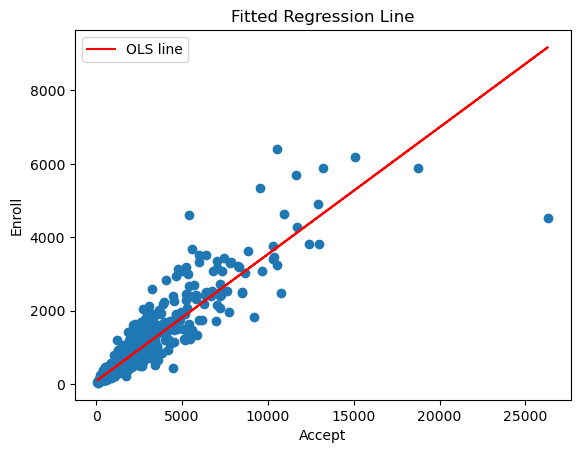

In [26]:
#plotting enroll and accept

plt.scatter(df['Accept'],y)
plt.plot(df['Accept'], m1.predict(X), color='red', label='OLS line')
plt.xlabel('Accept')
plt.ylabel('Enroll')
plt.title('Fitted Regression Line')
plt.legend()
plt.show()

In [28]:
X = df[['Accept','Expend']]
y = df['Enroll']
X = sm.add_constant(X)

# Fit the model
m2 = sm.OLS(y, X).fit()
print(m2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Enroll   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1938.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          4.11e-302
Time:                        20:47:49   Log-Likelihood:                -5715.6
No. Observations:                 777   AIC:                         1.144e+04
Df Residuals:                     774   BIC:                         1.145e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.9809     29.783      5.506      0.0

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF 
vif = pd.DataFrame() #empty df
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

#low vif -> low multicollinearityx

  feature       VIF
0   const  4.784388
1  Accept  1.015800
2  Expend  1.015800
